### Setup and Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

# NOTE: neural_final_proj should be installed as an editable package.
# Run this command in your terminal:
# pip install -e .
from neural_final_proj.core_models import CustomCNN, ResNetSmall
from neural_final_proj.project_utils import (
    prepare_data_loaders, 
    train_model, 
    count_parameters,
    plot_interpretability_results 
)

IMAGE_SIZE = 64 # Resizing to 64x64 pixels
BATCH_SIZE = 64
NUM_CLASSES = 10 
NUM_EPOCHS = 20
DATA_ROOT = 'data/Sports'
DEVICE = torch.device("cpu") 
MODELS_DIR = 'problem_A_outputs'

In [ ]:
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir('..')
current_folder_name = os.path.basename(os.getcwd())

WIDTH = 30
print(f"{'Current directory:':<{WIDTH}}{current_folder_name}")
print(f"{'Using device:':<{WIDTH}}{DEVICE}")
print(f"{'Image Size:':<{WIDTH}}{IMAGE_SIZE}x{IMAGE_SIZE}")
print(f"{'Data will be pulled from:':<{WIDTH}}{DATA_ROOT}")
print(f"{'Models will be saved to:':<{WIDTH}}{MODELS_DIR}")

Current directory:            EE4745_Final_Proj
Using device:                 cpu
Image Size:                   64x64
Data will be pulled from:     data/Sports
Models will be saved to:      model_A_results


### Cell 2: Data Preparation

In [4]:
try:
    train_loader, val_loader, class_names, val_dataset = prepare_data_loaders(
        DATA_ROOT, IMAGE_SIZE, BATCH_SIZE
    )
    print(f"Loaded {len(class_names)} classes: {class_names}")
    print(f"Train samples: {len(train_loader.dataset)}, Validation samples: {len(val_loader.dataset)}")
except Exception as e:
    print(f"\n--- DATASET ERROR ---")
    print(f"Please check that your dataset is located at '{DATA_ROOT}' with 'train' and 'valid' subfolders.")
    print(f"Error details: {e}")

Loaded 10 classes: ['baseball', 'basketball', 'football', 'golf', 'hockey', 'rugby', 'swimming', 'tennis', 'volleyball', 'weightlifting']
Train samples: 1593, Validation samples: 50


### Model Initialization and Training (Custom CNN)


In [5]:
CNN_LOG_DIR = 'runs/problem_A_CNN'
model_cnn = CustomCNN(num_classes=NUM_CLASSES).to(DEVICE)
print(f"CustomCNN initialized. Parameters: {count_parameters(model_cnn)}")

# Train Model 1
results_cnn = train_model(
    model_cnn, 
    "CustomCNN", 
    train_loader, 
    val_loader, 
    NUM_EPOCHS, 
    DEVICE, 
    class_names,
    CNN_LOG_DIR,
    MODELS_DIR
)
print(f"\nCustomCNN Training Complete.")
print(f"Final Validation Accuracy: {results_cnn['final_val_accuracy']:.2f}%")

CustomCNN initialized. Parameters: 4293194

--- Training CustomCNN (Params: 4293194) on cpu ---
Epoch 1/20 | Train Acc: 27.75% | Val Acc: 42.00% | Time: 2.71s
Epoch 2/20 | Train Acc: 42.81% | Val Acc: 48.00% | Time: 2.70s
Epoch 3/20 | Train Acc: 49.97% | Val Acc: 54.00% | Time: 2.72s
Epoch 4/20 | Train Acc: 56.25% | Val Acc: 58.00% | Time: 2.71s
Epoch 5/20 | Train Acc: 58.57% | Val Acc: 62.00% | Time: 2.62s
Epoch 6/20 | Train Acc: 61.46% | Val Acc: 60.00% | Time: 2.67s
Epoch 7/20 | Train Acc: 64.28% | Val Acc: 68.00% | Time: 2.79s
Epoch 8/20 | Train Acc: 67.36% | Val Acc: 66.00% | Time: 2.52s
Epoch 9/20 | Train Acc: 70.68% | Val Acc: 68.00% | Time: 2.54s
Epoch 10/20 | Train Acc: 74.01% | Val Acc: 68.00% | Time: 2.60s
Epoch 11/20 | Train Acc: 75.71% | Val Acc: 68.00% | Time: 2.44s
Epoch 12/20 | Train Acc: 79.66% | Val Acc: 66.00% | Time: 2.46s
Epoch 13/20 | Train Acc: 78.47% | Val Acc: 64.00% | Time: 2.44s
Epoch 14/20 | Train Acc: 82.55% | Val Acc: 68.00% | Time: 2.42s
Epoch 15/20 | Tra

### Model Initialization and Training (ResNet Small)

In [6]:
RESNET_LOG_DIR = 'runs/problem_A_RESNET'

model_resnet = ResNetSmall(num_classes=NUM_CLASSES).to(DEVICE)
print(f"ResNetSmall initialized. Parameters: {count_parameters(model_resnet)}")

# Train Model 2
results_resnet = train_model(
    model_resnet,
    "ResNetSmall",   
    train_loader,
    val_loader,
    NUM_EPOCHS,
    DEVICE,
    class_names,
    RESNET_LOG_DIR,
    MODELS_DIR
)
print(f"\nResNetSmall Training Complete.")
print(f"Final Validation Accuracy: {results_resnet['final_val_accuracy']:.2f}%")

ResNetSmall initialized. Parameters: 701466

--- Training ResNetSmall (Params: 701466) on cpu ---
Epoch 1/20 | Train Acc: 36.85% | Val Acc: 24.00% | Time: 8.63s
Epoch 2/20 | Train Acc: 52.61% | Val Acc: 48.00% | Time: 8.44s
Epoch 3/20 | Train Acc: 56.56% | Val Acc: 54.00% | Time: 8.16s
Epoch 4/20 | Train Acc: 59.82% | Val Acc: 54.00% | Time: 8.25s
Epoch 5/20 | Train Acc: 62.84% | Val Acc: 40.00% | Time: 7.86s
Epoch 6/20 | Train Acc: 65.41% | Val Acc: 60.00% | Time: 8.34s
Epoch 7/20 | Train Acc: 66.85% | Val Acc: 66.00% | Time: 8.11s
Epoch 8/20 | Train Acc: 68.36% | Val Acc: 70.00% | Time: 8.10s
Epoch 9/20 | Train Acc: 70.24% | Val Acc: 58.00% | Time: 8.05s
Epoch 10/20 | Train Acc: 72.00% | Val Acc: 52.00% | Time: 8.00s
Epoch 11/20 | Train Acc: 72.63% | Val Acc: 58.00% | Time: 7.87s
Epoch 12/20 | Train Acc: 73.51% | Val Acc: 68.00% | Time: 7.99s
Epoch 13/20 | Train Acc: 75.89% | Val Acc: 76.00% | Time: 8.08s
Epoch 14/20 | Train Acc: 74.01% | Val Acc: 62.00% | Time: 7.99s
Epoch 15/20 | T

### Model Comparison and Reporting

In [7]:
data = [results_cnn, results_resnet]

WIDTH_MODEL = 15
WIDTH_COUNT = 18
WIDTH_TIME = 25
WIDTH_ACCURACY = 25

print("\n"+5*" "+"Model Overview\n"+60*"-")
print(
    f"{'Model':<{WIDTH_MODEL}}" +
    f"{'Parameter Count':<{WIDTH_COUNT}}" + 
    f"{'Total Training Time (s)':<{WIDTH_TIME}}" +
    f"{'Final Val Accuracy (%)':<{WIDTH_ACCURACY}}"
)
for r in data:
    print(
        f"{r['model_name']:<{WIDTH_MODEL}}" +
        f"{r['parameter_count']:<{WIDTH_COUNT},d}" +
        f"{r['total_training_time']:<{WIDTH_TIME}.2f}" +
        f"{r['final_val_accuracy']:<{WIDTH_ACCURACY}.2f}"
    )

# Per-Class Performance (CustomCNN)
print("\n\n"+5*" "+"Per-Class Performance (CustomCNN)\n"+60*"-")
print(classification_report(results_cnn['all_labels'], 
                            results_cnn['all_preds'], 
                            target_names=class_names, 
                            output_dict=False))

# Per-Class Performance (ResNetSmall)
print("\n"+5*" "+"Per-Class Performance (ResNetSmall)\n"+60*"-")
print(classification_report(results_resnet['all_labels'], 
                            results_resnet['all_preds'], 
                            target_names=class_names, 
                            output_dict=False))


     Model Overview
------------------------------------------------------------
Model          Parameter Count   Total Training Time (s)  Final Val Accuracy (%)   
CustomCNN      4,293,194         52.42                    68.00                    
ResNetSmall    701,466           163.46                   72.00                    


     Per-Class Performance (CustomCNN)
------------------------------------------------------------
               precision    recall  f1-score   support

     baseball       0.60      0.60      0.60         5
   basketball       0.67      0.40      0.50         5
     football       0.75      0.60      0.67         5
         golf       0.67      0.80      0.73         5
       hockey       0.83      1.00      0.91         5
        rugby       0.50      0.40      0.44         5
     swimming       0.83      1.00      0.91         5
       tennis       0.40      0.40      0.40         5
   volleyball       0.67      0.80      0.73         5
weightlifting

### Visualization (Training/Validation Curves)

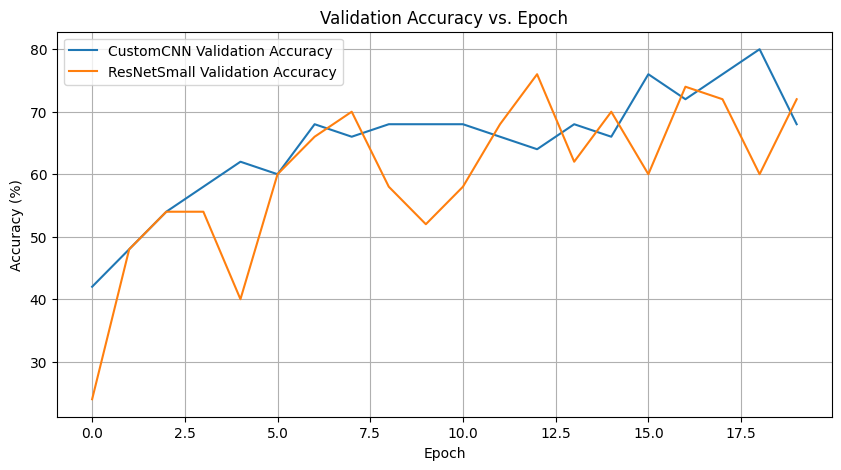

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(results_cnn['val_accuracies'], label='CustomCNN Validation Accuracy')
plt.plot(results_resnet['val_accuracies'], label='ResNetSmall Validation Accuracy')
plt.title('Validation Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

# NOTE: The full loss and accuracy curves should be viewed in TensorBoard.
# Run this command in your terminal:
# tensorboard --logdir runs

### Model Interpretability (Saliency & Grad-CAM)

--- Visualization Params ---
True Label:    baseball
Tensor Shape:  torch.Size([1, 3, 64, 64])

--- Visualization for CustomCNN ---


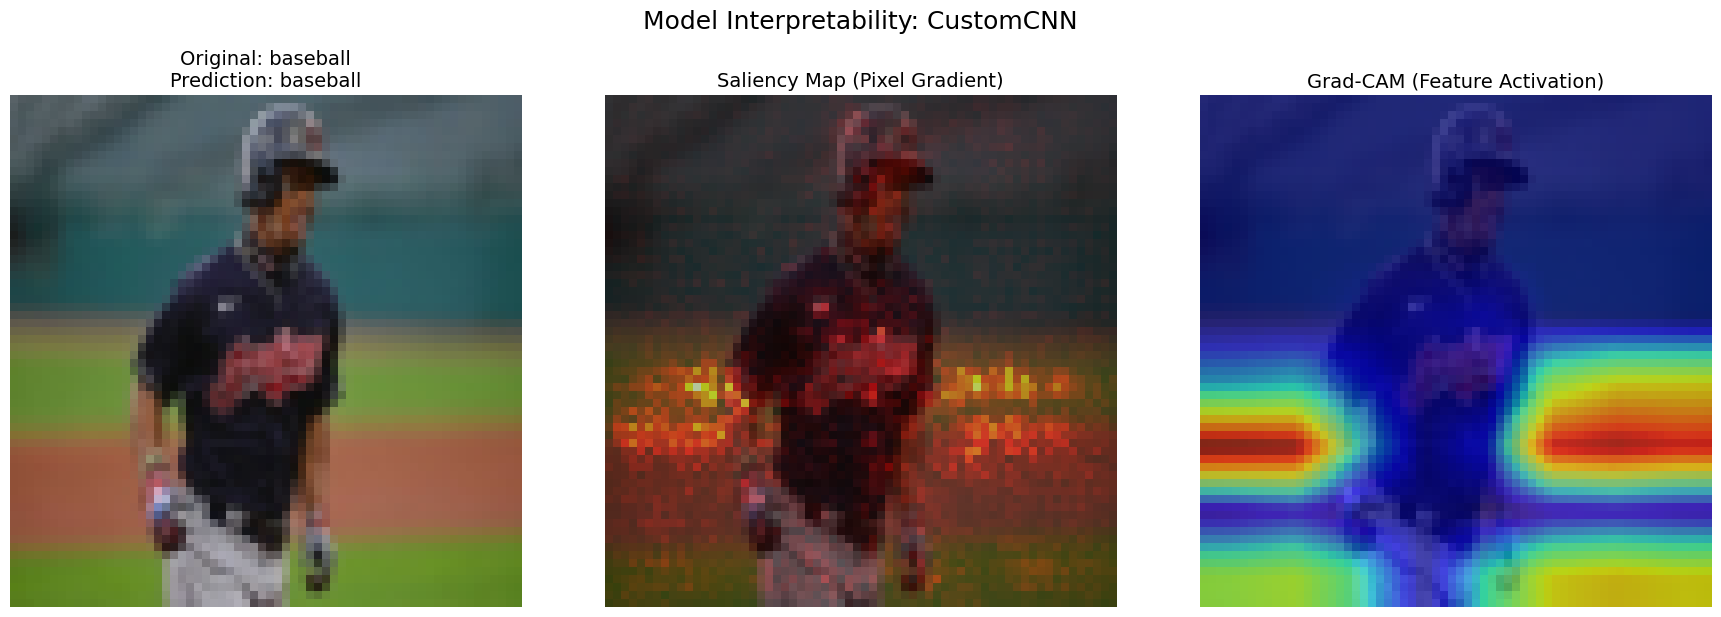


--- Visualization for ResNetSmall ---


c:\Users\packj\OneDrive\Documents\School\LSU-8 Fall 2025\EE 4745\EE4745_Final_Proj\.venv\Lib\site-packages\torch\nn\modules\module.py:1866: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


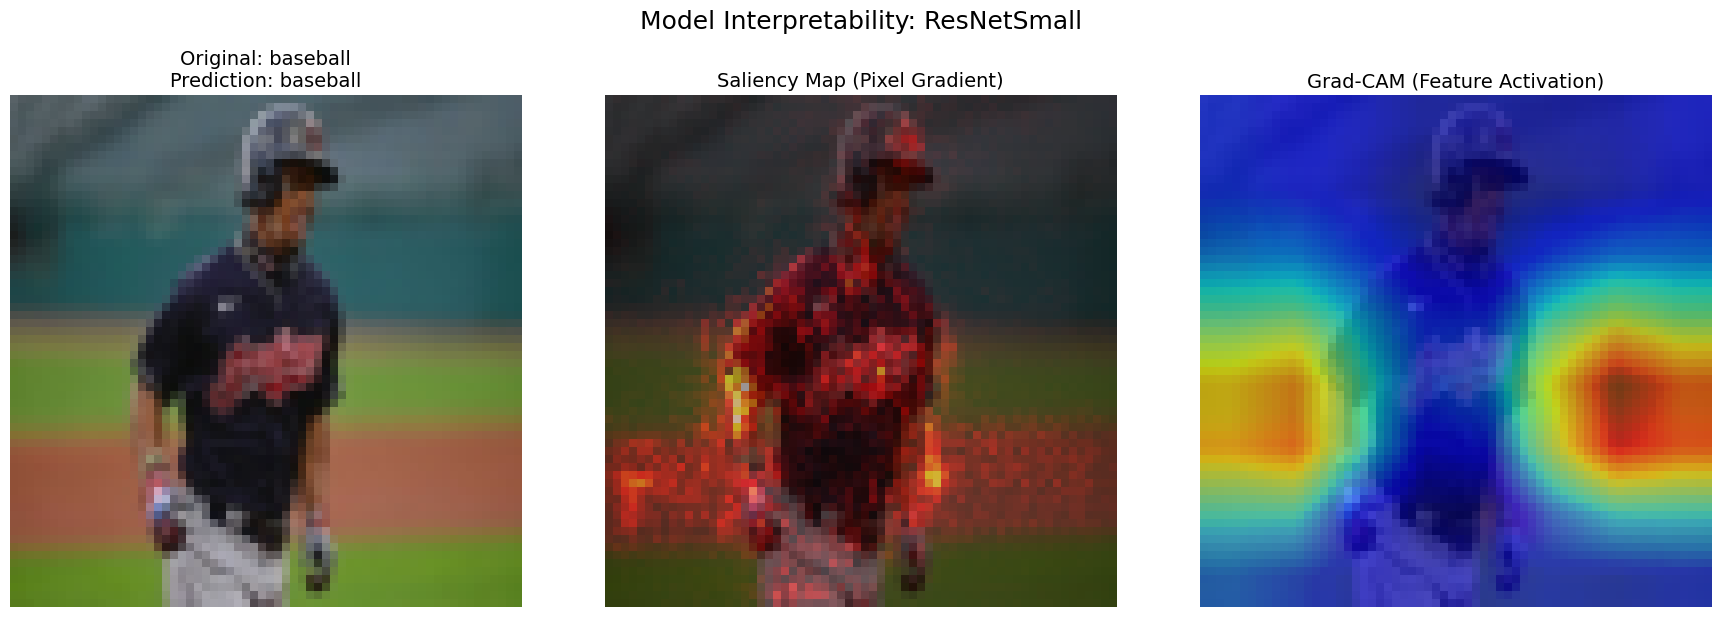

In [9]:
sample_idx = 0 
sample_img_tensor, actual_label_idx = val_dataset[sample_idx]
actual_class = class_names[actual_label_idx]
input_tensor = sample_img_tensor.unsqueeze(0).to(DEVICE)

print(f"--- Visualization Params ---")
print(f"{"True Label:":<15}{actual_class}")
print(f"{"Tensor Shape:":<15}{input_tensor.shape}")

print("\n--- Visualization for CustomCNN ---")
plot_interpretability_results(
    model=model_cnn, 
    model_name="CustomCNN", 
    input_tensor=input_tensor, 
    sample_img_tensor=sample_img_tensor, 
    actual_label=actual_label_idx, 
    class_names=class_names,
    models_dir=MODELS_DIR
)

print("\n--- Visualization for ResNetSmall ---")
plot_interpretability_results(
    model=model_resnet, 
    model_name="ResNetSmall", 
    input_tensor=input_tensor, 
    sample_img_tensor=sample_img_tensor, 
    actual_label=actual_label_idx, 
    class_names=class_names,
    models_dir=MODELS_DIR
)